In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import datetime as dt
import plotly.express as px
import matplotlib.ticker as ticker

## Detalle de compras   **Dani*

In [5]:
df_Detalle_De_Compras= pd.read_csv("DETALLE_COMPRA.csv")

In [6]:
df_Detalle_De_Compras.head()

,Detalle_compraID,TiendaID,ProductoID,CompraID,Descripcion,Tamaño,Fecha_entrega,Precio_compra,Cantidad,Clasificacion
0,1,69,8412,8124,Tequila Ocho Plata Fresno,750mL,2016-01-02 00:00:00,35.71,6,1
1,2,30,5255,8137,TGI Fridays Ultimte Mudslide,1.75L,2016-01-01 00:00:00,9.35,4,1
2,3,34,5215,8137,TGI Fridays Long Island Iced,1.75L,2016-01-02 00:00:00,9.41,5,1
3,4,1,5255,8137,TGI Fridays Ultimte Mudslide,1.75L,2016-01-01 00:00:00,9.35,6,1
4,5,76,2034,8169,Glendalough Double Barrel,750mL,2016-01-02 00:00:00,21.32,5,1


In [7]:
df_Detalle_De_Compras.shape

(2372474, 10)

In [8]:
df_Detalle_De_Compras.isnull().sum()[df_Detalle_De_Compras.isnull().sum() > 0]

Series([], dtype: int64)

In [9]:
df_Detalle_De_Compras.describe(include="all")

,Detalle_compraID,TiendaID,ProductoID,CompraID,Descripcion,Tamaño,Fecha_entrega,Precio_compra,Cantidad,Clasificacion
count,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2372474,2372474,2372474,2.372474e+06,2.372474e+06,2.372474e+06
unique,NaN,NaN,NaN,NaN,9652,52,364,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Tito's Handmade Vodka,750mL,2016-07-05 00:00:00,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,16442,1207700,19640,NaN,NaN,NaN
mean,1.186238e+06,4.465133e+01,1.241864e+04,1.104094e+04,NaN,NaN,NaN,1.205327e+01,1.415585e+01,1.443520e+00
std,6.848744e+05,2.351245e+01,1.255728e+04,1.565340e+03,NaN,NaN,NaN,1.794743e+01,2.344616e+01,4.967999e-01
min,1.000000e+00,1.000000e+00,5.800000e+01,8.106000e+03,NaN,NaN,NaN,3.600000e-01,1.000000e+00,1.000000e+00
25%,5.931192e+05,2.500000e+01,3.639000e+03,9.761000e+03,NaN,NaN,NaN,6.120000e+00,6.000000e+00,1.000000e+00
50%,1.186238e+06,4.800000e+01,6.523000e+03,1.110300e+04,NaN,NaN,NaN,9.220000e+00,1.000000e+01,1.000000e+00
75%,1.779356e+06,6.700000e+01,1.887700e+04,1.239700e+04,NaN,NaN,NaN,1.449000e+01,1.200000e+01,2.000000e+00


In [10]:
df_Detalle_De_Compras.columns

Index(['Detalle_compraID', 'TiendaID', 'ProductoID', 'CompraID', 'Descripcion',
       'Tamaño', 'Fecha_entrega', 'Precio_compra', 'Cantidad',
       'Clasificacion'],
      dtype='object')

In [11]:
Compras = df_Detalle_De_Compras.groupby('ProductoID').size().reset_index(name='numero_de_Compras')

In [12]:
Compras['Descripcion'] = df_Detalle_De_Compras['Descripcion']


In [13]:
Compras

,ProductoID,numero_de_Compras,Descripcion
0,58,596,Tequila Ocho Plata Fresno
1,60,97,TGI Fridays Ultimte Mudslide
2,61,26,TGI Fridays Long Island Iced
3,62,567,TGI Fridays Ultimte Mudslide
4,63,524,Glendalough Double Barrel
...,...,...,...
10659,90089,9,Jack Daniels No 7 Black
10660,90090,2,Southern Comfort
10661,90604,13,Southern Comfort
10662,90609,11,Chambord Royale de France


In [14]:
df_Detalle_De_Compras

,Detalle_compraID,TiendaID,ProductoID,CompraID,Descripcion,Tamaño,Fecha_entrega,Precio_compra,Cantidad,Clasificacion
0,1,69,8412,8124,Tequila Ocho Plata Fresno,750mL,2016-01-02 00:00:00,35.71,6,1
1,2,30,5255,8137,TGI Fridays Ultimte Mudslide,1.75L,2016-01-01 00:00:00,9.35,4,1
2,3,34,5215,8137,TGI Fridays Long Island Iced,1.75L,2016-01-02 00:00:00,9.41,5,1
3,4,1,5255,8137,TGI Fridays Ultimte Mudslide,1.75L,2016-01-01 00:00:00,9.35,6,1
4,5,76,2034,8169,Glendalough Double Barrel,750mL,2016-01-02 00:00:00,21.32,5,1
...,...,...,...,...,...,...,...,...,...,...
2372469,2372470,49,22298,13593,Zorvino Vyds Sangiovese,750mL,2016-12-28 00:00:00,8.06,12,2
2372470,2372471,1,19556,13593,Zorvino Bacca Z Blackberry,750mL,2016-12-27 00:00:00,9.39,12,2
2372471,2372472,66,22297,13593,Zorvino Vyds Pearz,750mL,2016-12-26 00:00:00,6.75,12,2
2372472,2372473,69,19557,13593,Zorvino Fragole Z Strawberry,750mL,2016-12-26 00:00:00,9.39,12,2


## Inventario Final **Leidy*

In [15]:
df_Final_inventario= pd.read_csv("InventarioFinal.csv")

In [16]:
df_Final_inventario.isnull().sum()[df_Final_inventario.isnull().sum() > 0]

Series([], dtype: int64)

In [17]:
df_Final_inventario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InventarioID  224489 non-null  object 
 1   TiendaID      224489 non-null  int64  
 2   Ciudad        224489 non-null  object 
 3   ProductoID    224489 non-null  int64  
 4   Descripcion   224489 non-null  object 
 5   Tamaño        224489 non-null  object 
 6   Stock         224489 non-null  int64  
 7   Precio_venta  224489 non-null  float64
 8   Fecha_fin     224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [18]:
df_Final_inventario.iloc[113895:115179]

,InventarioID,TiendaID,Ciudad,ProductoID,Descripcion,Tamaño,Stock,Precio_venta,Fecha_fin
113895,46_TYWARDREATH_58,46,TYWARDREATH,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46_TYWARDREATH_62,46,TYWARDREATH,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46_TYWARDREATH_63,46,TYWARDREATH,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46_TYWARDREATH_77,46,TYWARDREATH,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46_TYWARDREATH_106,46,TYWARDREATH,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46_TYWARDREATH_46447,46,TYWARDREATH,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46_TYWARDREATH_46458,46,TYWARDREATH,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46_TYWARDREATH_46476,46,TYWARDREATH,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46_TYWARDREATH_46764,46,TYWARDREATH,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


In [13]:
# Reemplazar valores nulos en la columna 'City' con 'TYWARDREATH'
#df_Final_inventario.loc[113895:115178, 'City'] = df_Final_inventario.loc[113895:115179, 'City'].fillna('TYWARDREATH')


In [19]:
#df_Final_inventario.iloc[113895:115179]


,InventarioID,TiendaID,Ciudad,ProductoID,Descripcion,Tamaño,Stock,Precio_venta,Fecha_fin
113895,46_TYWARDREATH_58,46,TYWARDREATH,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46_TYWARDREATH_62,46,TYWARDREATH,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46_TYWARDREATH_63,46,TYWARDREATH,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46_TYWARDREATH_77,46,TYWARDREATH,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46_TYWARDREATH_106,46,TYWARDREATH,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46_TYWARDREATH_46447,46,TYWARDREATH,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46_TYWARDREATH_46458,46,TYWARDREATH,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46_TYWARDREATH_46476,46,TYWARDREATH,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46_TYWARDREATH_46764,46,TYWARDREATH,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


In [20]:
df_Final_inventario.isnull().sum()[df_Final_inventario.isnull().sum() > 0]

Series([], dtype: int64)

In [16]:
# Convertir las columnas 'Store' y 'Brand' a strings en un rango específico de índices
#df_Final_inventario.loc[113895:115179, 'Store'] = df_Final_inventario.loc[113895:115179, 'Store'].astype(str)
#df_Final_inventario.loc[113895:115179, 'Brand'] = df_Final_inventario.loc[113895:115179, 'Brand'].astype(str)


C:\Users\miass\AppData\Local\Temp\ipykernel_15180\2558351184.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['46' '46' '46' ... '46' '46' '47']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_Final_inventario.loc[113895:115179, 'Store'] = df_Final_inventario.loc[113895:115179, 'Store'].astype(str)
C:\Users\miass\AppData\Local\Temp\ipykernel_15180\2558351184.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['58' '62' '63' ... '46764' '46830' '62']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_Final_inventario.loc[113895:115179, 'Brand'] = df_Final_inventario.loc[113895:115179, 'Brand'].astype(str)


La advertencia que estás viendo es un FutureWarning de pandas, que te informa sobre un cambio futuro en la forma en que pandas manejará las asignaciones de tipos de datos incompatibles. En una versión futura de pandas, el código que estás ejecutando causará un error en lugar de solo una advertencia.

In [17]:
# Convertir las columnas 'Store' y 'Brand' a strings y luego asignarlas
#df_Final_inventario.loc[113895:115179, 'Store'] = df_Final_inventario.loc[113895:115179, 'Store'].apply(str)
#df_Final_inventario.loc[113895:115179, 'Brand'] = df_Final_inventario.loc[113895:115179, 'Brand'].apply(str)


En este código, estamos utilizando el método .apply(str) para convertir cada valor en las columnas ‘Store’ y ‘Brand’ a string antes de realizar la asignación. Esto debería prevenir la advertencia y asegurar la compatibilidad con versiones futuras de pandas.

In [18]:
# Concatenar con un separador específico, por ejemplo, un guion '-'
#df_Final_inventario.loc[113895:115179, 'InventoryId'] = df_Final_inventario.loc[113895:115179, 'Store'] + '_' + df_Final_inventario.loc[113895:115179, 'City'] + '_' + df_Final_inventario.loc[113895:115179, 'Brand']


In [19]:
#df_Final_inventario.iloc[113895:115179]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
113895,46_TYWARDREATH_58,46,TYWARDREATH,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46_TYWARDREATH_62,46,TYWARDREATH,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46_TYWARDREATH_63,46,TYWARDREATH,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46_TYWARDREATH_77,46,TYWARDREATH,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46_TYWARDREATH_106,46,TYWARDREATH,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46_TYWARDREATH_46447,46,TYWARDREATH,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46_TYWARDREATH_46458,46,TYWARDREATH,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46_TYWARDREATH_46476,46,TYWARDREATH,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46_TYWARDREATH_46764,46,TYWARDREATH,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


In [21]:
df_Final_inventario.columns

Index(['InventarioID', 'TiendaID', 'Ciudad', 'ProductoID', 'Descripcion',
       'Tamaño', 'Stock', 'Precio_venta', 'Fecha_fin'],
      dtype='object')

In [21]:
#df_Final_inventario['endDate'] = pd.to_datetime(df_Final_inventario["endDate"])


In [22]:
df_Final_inventario.shape


(224489, 9)

In [25]:
# Cambiamos los nombres de cada columna para entender mejor el df
'''
nuevos_nombres_3 = {
    'InventoryId': 'InventarioId',
    'Store': 'Tienda','City':'Ciudad', 'Brand': 'ProductoID', 'Description': 'Descripcion', 'Size': 'Tamaño',
    'onHand': 'stock', 'Price': 'Precio_venta', 'endDate': 'Fecha_finalizacion'
    
}

# Renombra las columnas
df_Final_inventario.rename(columns=nuevos_nombres_3, inplace=True)
'''

In [23]:
df_Final_inventario

,InventarioID,TiendaID,Ciudad,ProductoID,Descripcion,Tamaño,Stock,Precio_venta,Fecha_fin
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31
...,...,...,...,...,...,...,...,...,...
224484,81_PEMBROKE_90087,81,PEMBROKE,90087,Ch Mouton Rothschild 12 Paui,750mL,3,469.99,2016-12-31
224485,81_PEMBROKE_90088,81,PEMBROKE,90088,Ch Le Petite Mouton 12 Pauil,750mL,3,134.99,2016-12-31
224486,81_PEMBROKE_90089,81,PEMBROKE,90089,Ch Lynch Bages 12 Pauillac,750mL,3,119.99,2016-12-31
224487,81_PEMBROKE_90090,81,PEMBROKE,90090,Ch Lafite Rothschild 12,750mL,3,649.99,2016-12-31


In [24]:
Stock_final = df_Final_inventario.groupby('ProductoID').size().reset_index(name='Cantidad_Final')


In [25]:
Stock_final ['Descripcion'] = df_Final_inventario['Descripcion']


In [27]:
Stock_final ['TiendaID'] = df_Final_inventario['TiendaID']

In [28]:
Stock_final

,ProductoID,Cantidad_Final,Descripcion,TiendaID
0,58,41,Gekkeikan Black & Gold Sake,1
1,60,16,Herradura Silver Tequila,1
2,61,1,Herradura Reposado Tequila,1
3,62,73,No. 3 London Dry Gin,1
4,63,70,Three Olives Tomato Vodka,1
...,...,...,...,...
9648,90089,9,Smirnoff Strawberry Vodka,5
9649,90090,6,Hornitos Lime Shot Tequila,5
9650,90604,6,Absolut Peppar,5
9651,90609,10,Zhenka 80 Proof,5


In [30]:
Stock_final_2 = df_Final_inventario.groupby('InventarioID').size().reset_index(name='Cantidad_Final')


In [31]:
Stock_final_2 ['Ciudad'] = df_Final_inventario['Ciudad']

In [32]:
Stock_final_2

,InventarioID,Cantidad_Final,Ciudad
0,10_HORNSEY_1001,1,HARDERSFIELD
1,10_HORNSEY_1003,1,HARDERSFIELD
2,10_HORNSEY_10058,1,HARDERSFIELD
3,10_HORNSEY_10062,1,HARDERSFIELD
4,10_HORNSEY_10164,1,HARDERSFIELD
...,...,...,...
224484,9_BLACKPOOL_9361,1,PEMBROKE
224485,9_BLACKPOOL_9388,1,PEMBROKE
224486,9_BLACKPOOL_942,1,PEMBROKE
224487,9_BLACKPOOL_966,1,PEMBROKE


In [27]:
#df_Final_inventario.to_csv("InventarioFinal.csv", index=False)#guardamos el Df limpio

## Ventas **Leidy*

In [33]:
df_Ventas = pd.read_csv("Ventas.csv")

In [34]:
df_Ventas.shape

(1048575, 15)

In [35]:
df_Ventas

,VentaID,Fecha_venta,Año,Mes,Dia,InventarioID,TiendaID,ProductoID,Descripcion,Tamaño,Clasificacion,Precio_venta,Cantidad,Precio_total,Impuesto
0,0,2016-01-01,2016,1,1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,1,16.49,0.79
1,1,2016-01-02,2016,1,2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,2,32.98,1.57
2,2,2016-01-03,2016,1,3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,1,16.49,0.79
3,3,2016-01-08,2016,1,8,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,1,14.49,0.79
4,4,2016-01-09,2016,1,9,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,2,69.98,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,2016-02-12,2016,2,12,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,2,12.95,4,51.80,0.45
1048571,1048571,2016-02-13,2016,2,13,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,2,12.95,8,103.60,0.90
1048572,1048572,2016-02-19,2016,2,19,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,2,12.95,1,12.95,0.11
1048573,1048573,2016-02-22,2016,2,22,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,2,12.95,3,38.85,0.34


In [6]:
'''
# Convertir la columna 'Fecha_venta' a datetime
df_Ventas['Fecha_venta'] = pd.to_datetime(df_Ventas['Fecha_venta'])

# Extraer año, mes y día de 'Fecha_venta'
df_Ventas['Año'] = df_Ventas['Fecha_venta'].dt.year
df_Ventas['Mes'] = df_Ventas['Fecha_venta'].dt.month
df_Ventas['Dia'] = df_Ventas['Fecha_venta'].dt.day
'''

In [36]:
df_Ventas.isnull().sum()[df_Ventas.isnull().sum() > 0]

Series([], dtype: int64)

In [37]:
df_Ventas.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [38]:
df_Ventas.columns

Index(['VentaID', 'Fecha_venta', 'Año', 'Mes', 'Dia', 'InventarioID',
       'TiendaID', 'ProductoID', 'Descripcion', 'Tamaño', 'Clasificacion',
       'Precio_venta', 'Cantidad', 'Precio_total', 'Impuesto'],
      dtype='object')

In [33]:
# Convertir la columna 'salesdate' a tipo datetime con un formato específico
#df_Ventas['SalesDate'] = pd.to_datetime(df_Ventas['SalesDate'], format='%m/%d/%Y')


In [39]:
df_Ventas.Fecha_venta.value_counts()

Fecha_venta
2016-01-29    54142
2016-01-30    47256
2016-01-23    44792
2016-01-22    44276
2016-01-15    43946
2016-01-09    43639
2016-01-16    41359
2016-01-08    41249
2016-01-02    38449
2016-01-21    30204
2016-01-31    30164
2016-01-28    29699
2016-01-17    29329
2016-01-14    28649
2016-01-24    27798
2016-01-07    27027
2016-01-27    24352
2016-01-01    24282
2016-01-20    24146
2016-01-06    23277
2016-01-03    23217
2016-01-13    23213
2016-01-12    23116
2016-01-18    22575
2016-01-10    22487
2016-01-19    22325
2016-01-26    22149
2016-01-11    21353
2016-01-25    19928
2016-01-05    19614
2016-01-04    19584
2016-02-12     6218
2016-02-13     6176
2016-02-06     5891
2016-02-19     5752
2016-02-26     5515
2016-02-27     5414
2016-02-20     5227
2016-02-05     4876
2016-02-11     4047
2016-02-18     3652
2016-02-04     3599
2016-02-25     3566
2016-02-07     3540
2016-02-14     3465
2016-02-17     3288
2016-02-23     3230
2016-02-10     3117
2016-02-28     3109
2016-02-

*podemos ver que se registran ventas muy altas para un solo dia y la inconsistencia de fechas pues no temos registros si no de dos meses del año que son enero y febrero. proponemos un sistema que permita mejorar la calidad y el control del inventario. observamos que hay muchas cosas que estan en las compras que no estan en el inventario inicial*

In [90]:
df_Ventas.Fecha_venta.value_counts().sum()

1048575

In [89]:
df_Ventas.Fecha_venta.unique()

<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-03 00:00:00',
 '2016-01-08 00:00:00', '2016-01-09 00:00:00', '2016-01-15 00:00:00',
 '2016-01-22 00:00:00', '2016-01-30 00:00:00', '2016-01-05 00:00:00',
 '2016-01-06 00:00:00', '2016-01-10 00:00:00', '2016-01-19 00:00:00',
 '2016-01-23 00:00:00', '2016-01-25 00:00:00', '2016-01-29 00:00:00',
 '2016-01-07 00:00:00', '2016-01-14 00:00:00', '2016-01-16 00:00:00',
 '2016-01-18 00:00:00', '2016-01-24 00:00:00', '2016-01-28 00:00:00',
 '2016-01-20 00:00:00', '2016-01-12 00:00:00', '2016-01-04 00:00:00',
 '2016-01-13 00:00:00', '2016-01-26 00:00:00', '2016-01-17 00:00:00',
 '2016-01-21 00:00:00', '2016-01-27 00:00:00', '2016-01-31 00:00:00',
 '2016-01-11 00:00:00', '2016-02-13 00:00:00', '2016-02-09 00:00:00',
 '2016-02-10 00:00:00', '2016-02-11 00:00:00', '2016-02-16 00:00:00',
 '2016-02-17 00:00:00', '2016-02-20 00:00:00', '2016-02-22 00:00:00',
 '2016-02-23 00:00:00', '2016-02-25 00:00:00', '2016-02-05 00:00:00',
 '20

In [86]:
df_Ventas.ProductoID.value_counts()

ProductoID
3606     2077
8111     2064
1892     2016
4261     1969
5111     1962
         ... 
11774       1
1173        1
13478       1
44394       1
18948       1
Name: count, Length: 7658, dtype: int64

In [88]:
df_Ventas.TiendaID.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59,  6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,  7, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79,  8,  9], dtype=int64)

In [25]:
#df_Ventas_Copia = df_Ventas.copy()#realizamos una copia para hacer algunas consultas

In [39]:
#df_Ventas_Copia.to_csv("Ventas_copia.csv", index=True)#guardamos la copia 

In [84]:
# Contar el número de filas (ventas) por tienda
ventas_por_tienda = df_Ventas.groupby('TiendaID').size().reset_index(name='numero_de_ventas')


In [85]:
ventas_por_tienda

,TiendaID,numero_de_ventas
0,1,34975
1,2,12163
2,3,1219
3,4,9575
4,5,4721
...,...,...
74,75,9850
75,76,32456
76,77,9004
77,78,7490


*No se registran ventas para la tiendas 80 y 81*

In [81]:
# Contar el número de filas (ventas) por fecha
ventas_por_fecha = df_Ventas.groupby('Fecha_venta').size().reset_index(name='numero_de_ventas')


In [82]:
ventas_por_fecha

,Fecha_venta,numero_de_ventas
0,2016-01-01,24282
1,2016-01-02,38449
2,2016-01-03,23217
3,2016-01-04,19584
4,2016-01-05,19614
5,2016-01-06,23277
6,2016-01-07,27027
7,2016-01-08,41249
8,2016-01-09,43639
9,2016-01-10,22487


In [77]:
ventas_por_Producto = df_Ventas.groupby('ProductoID').size().reset_index(name='numero_de_ventas')

In [78]:
ventas_por_Producto['Descripcion'] = df_Ventas['Descripcion']


In [79]:
ventas_por_Producto

,ProductoID,numero_de_ventas,Descripcion
0,58,212,Jim Beam w/2 Rocks Glasses
1,60,99,Jim Beam w/2 Rocks Glasses
2,61,2,Jim Beam w/2 Rocks Glasses
3,62,132,Jim Beam w/2 Rocks Glasses
4,63,107,Maker's Mark Combo Pack
...,...,...,...
7653,90084,2,Cold River Blueberry Vodka
7654,90085,1,Smirnoff Vanilla Vodka
7655,90086,1,Smirnoff Vanilla Vodka
7656,90087,1,Falesco Vitiano Umbria


In [44]:
# Creamos el Id para la tabla de Ventas
#df_Ventas.reset_index(inplace=True)
#df_Ventas.rename(columns={'index': 'VentaID'}, inplace=True)


In [45]:
# Cambiamos los nombres de cada columna para entender mejor el df
'''
nuevos_nombres = {
    'VentaID': 'VentaID','InventoryId': 'InventarioId',
    'Store': 'Tienda', 'Brand': 'ProductoID', 'Description': 'Descripcion', 'Size': 'Tamaño',
    'SalesQuantity': 'Cantidad', 'SalesDollars': 'Precio_total', 'SalesPrice': 'Precio_venta',
    'SalesDate': 'Fecha_venta', 'Volume': 'Volumen', 'Classification': 'Clasificacion', 
    'ExciseTax': 'Impuesto', 'VendorNo': 'ProveedorID', 'VendorName': 'Proveedor'
    
}

# Renombra las columnas
df_Ventas.rename(columns=nuevos_nombres, inplace=True)
'''

In [46]:
# Reorganiza las columnas en el orden deseado
'''
df_Ventas = df_Ventas[['VentaID', 'Fecha_venta', 'InventarioId', 'Tienda', 'ProductoID', 'Descripcion', 
                'Tamaño', 'Volumen','Clasificacion', 'ProveedorID', 'Proveedor', 'Precio_venta', 
                'Cantidad','Precio_total', 'Impuesto' ]]
'''

In [22]:
df_Ventas.columns

Index(['VentaID', 'Fecha_venta', 'InventarioId', 'Tienda', 'ProductoID',
       'Descripcion', 'Tamaño', 'Volumen', 'Clasificacion', 'ProveedorID',
       'Proveedor', 'Precio_venta', 'Cantidad', 'Precio_total', 'Impuesto',
       'Año', 'Mes', 'Dia'],
      dtype='object')

In [23]:
valores_unicos_Ventas = df_Ventas['InventarioId'].unique()

In [24]:
valores_unicos_Ventas

array(['1_HARDERSFIELD_1004', '1_HARDERSFIELD_1005',
       '1_HARDERSFIELD_10058', ..., '19_WINTERVALE_38549',
       '19_WINTERVALE_38644', '19_WINTERVALE_38898'], dtype=object)

In [27]:
#df_Ventas.to_csv("Ventas.csv", index=False)#guardamos el Df limpio

In [42]:
df_Ventas.head()

,VentaID,Fecha_venta,Año,Mes,Dia,InventarioID,TiendaID,ProductoID,Descripcion,Tamaño,Clasificacion,Precio_venta,Cantidad,Precio_total,Impuesto
0,0,2016-01-01,2016,1,1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,1,16.49,0.79
1,1,2016-01-02,2016,1,2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,2,32.98,1.57
2,2,2016-01-03,2016,1,3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,1,16.49,0.79
3,3,2016-01-08,2016,1,8,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,1,14.49,0.79
4,4,2016-01-09,2016,1,9,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,2,69.98,0.79


## Visualizaciones Ventas ##

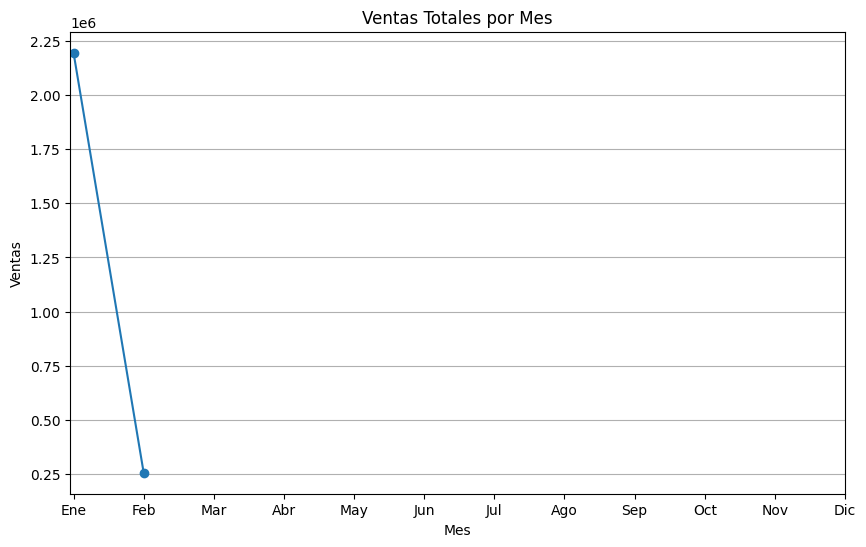

In [41]:
import matplotlib.pyplot as plt

# Agrupar por mes y calcular la suma de ventas
ventas_por_mes = df_Ventas.groupby("Mes")["Cantidad"].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(ventas_por_mes, marker='o')
plt.title("Ventas Totales por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y')
plt.show()


Este gráfico muestra las **Ventas Totales por Mes**. A continuación, se describen los detalles clave:

- **Eje X (Meses)**: *El eje horizontal está etiquetado con los meses del año, desde enero (Ene) hasta diciembre (Dic) en español.*
- **Eje Y (Ventas)**: *El eje vertical muestra valores de ventas, que van desde 0 hasta aproximadamente 2.25 millones (1e6) en la escala numérica.*
- **Punto de Datos**: *Hay un solo punto de datos visible en enero (Ene) que alcanza un valor cercano a 2 millones (2e6) en el eje Y, lo que sugiere ventas muy altas en ese mes.*
- **Tendencia**: *Después de enero, no hay más puntos de datos visibles en el gráfico, lo que indica una fuerte disminución en las ventas en los meses siguientes.*

*En resumen, este gráfico podría ser relevante para analizar tendencias de ventas y detectar posibles problemas o patrones estacionales.*

In [45]:
import altair as alt
# Agrupar por día del mes y sumar las ventas
df_Ventas['Dia_mes'] = df_Ventas['Dia']
ventas_por_dia_mes = df_Ventas.groupby('Dia_mes')['Cantidad'].sum().reset_index()

# Crear el gráfico de barras interactivo
chart = alt.Chart(ventas_por_dia_mes).mark_bar().encode(
    x=alt.X('Dia_mes:O', axis=alt.Axis(title='Día del Mes')),
    y=alt.Y('Cantidad:Q', title='Ventas Totales'),
    tooltip=['Dia_mes', 'Cantidad']
).properties(
    title='Ventas Totales por Día del Mes'
).interactive()


chart.show()


alt.Chart(...)

In [46]:
import pandas as pd
import altair as alt




# Agrupar por 'Mes' y 'Dia' y sumar 'Cantidad'
ventas_por_periodo_dia = df_Ventas.groupby(['Mes', 'Dia'])['Cantidad'].sum().reset_index()

#  Crear un gráfico de barras para cada 'Periodo'
for periodo in ventas_por_periodo_dia['Mes'].unique():
    # Filtrar datos por periodo
    df_filtrado = ventas_por_periodo_dia[ventas_por_periodo_dia['Mes'] == periodo]

    # 6. Crear gráfico de barras
    chart = alt.Chart(df_filtrado).mark_bar().encode(
        x=alt.X('Dia:O', axis=alt.Axis(title='Día del Mes')),
        y=alt.Y('Cantidad:Q', title='Ventas Totales'),
        tooltip=['Dia', 'Cantidad']
    ).properties(
        title=f'Ventas Totales por Día del Mes - {periodo}'
    ).interactive()

    # 7. Mostrar el gráfico
    chart.show()


alt.Chart(...)

alt.Chart(...)

In [60]:
import altair as alt
import pandas as pd

# ... (cargar y preparar los datos como antes)
df_Ventas['Fecha_venta'] = pd.to_datetime(df_Ventas['Fecha_venta'])

# Agrupar por 'Periodo', 'Dia' y sumar 'Cantidad'
ventas_por_periodo_dia = df_Ventas.groupby(['Periodo', 'Dia'])['Cantidad'].sum().reset_index()

# Crear un gráfico de barras para cada 'Periodo'
for periodo in ventas_por_periodo_dia['Periodo'].unique():
    # Filtrar datos por periodo
    df_filtrado = ventas_por_periodo_dia[ventas_por_periodo_dia['Periodo'] == periodo]
    
    # Convertir 'Dia' a datetime (si es necesario)
    df_filtrado['Dia'] = pd.to_datetime(df_filtrado['Dia'], format='%d')

    # Crear gráfico de barras
    chart = alt.Chart(df_filtrado).mark_bar().encode(
        x=alt.X('Dia:T', axis=alt.Axis(title='Día del Mes')),  
        y=alt.Y('Cantidad:Q', title='Ventas Totales'),
        tooltip=['Dia', 'Cantidad']
    ).properties(
        title=f'Ventas Totales por Día del Mes - {periodo}'
    ).interactive()

    # Mostrar el gráfico (o guardarlo)
    chart.show()


C:\Users\miass\AppData\Local\Temp\ipykernel_14580\495037226.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Dia'] = pd.to_datetime(df_filtrado['Dia'], format='%d')


alt.Chart(...)

C:\Users\miass\AppData\Local\Temp\ipykernel_14580\495037226.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Dia'] = pd.to_datetime(df_filtrado['Dia'], format='%d')


alt.Chart(...)

## Inventario Inicial **Leidy*

In [63]:
df_Inicial_inventario = pd.read_csv("InventarioInicial.csv")

In [64]:
df_Inicial_inventario.shape

(206529, 9)

In [65]:

valores_unicos = df_Inicial_inventario['Ciudad'].unique()


In [66]:
valores_unicos

array(['HARDERSFIELD', 'ASHBORNE', 'HORNSEY', 'EANVERNESS', 'SUTTON',
       'GOULCREST', 'STANMORE', 'ALNERWICK', 'BLACKPOOL', 'CARDEND',
       'LEESIDE', 'TARMSWORTH', 'BROMWICH', 'WANBORNE', 'LUNDY', 'OLDHAM',
       'FURNESS', 'WINTERVALE', 'BREDWARDINE', 'BALERNO', 'SHARNWICK',
       'ARBINGTON', 'PALPERROTH', 'CAERSHIRE', "KNIFE'S EDGE",
       'MOUNTMEND', 'LARNWICK', 'AYLESBURY', 'CULCHETH', 'PITMERDEN',
       'HALIVAARA', 'LEWES', 'PAETHSMOUTH', 'EASTHALLOW', 'BULLMAR',
       'BLACK HOLLOW', 'WOLFORD', 'PORTHCRAWL', 'VERITAS', 'TYWARDREATH',
       "PELLA'S WISH", 'NORFOLK', 'GARIGILL', 'ABERDEEN', 'GRAYCOTT',
       'HILLFAR', 'GUTHRAM', 'DRY GULCH', "BEGGAR'S HOLE", 'LANTEGLOS',
       'HARTLEPOOL', 'CLAETHORPES', 'IRRAGIN', 'AETHELNEY', 'KILMARNOCK',
       'SWORDBREAK', 'CESTERFIELD', 'LUTON', 'SOLARIS', 'KELD',
       'CLARCTON', 'DONCASTER', 'PAENTMARWY', 'BARNCOMBE', 'TAMWORTH',
       'EASTHAVEN', 'BALLYMENA'], dtype=object)

In [67]:
valores_unicos.shape

(67,)

In [68]:
df_Inicial_inventario.isnull().sum()[df_Inicial_inventario.isnull().sum() > 0]

Series([], dtype: int64)

In [40]:
df_Inicial_inventario.columns

Index(['InventarioId', 'Tienda', 'Ciudad', 'ProductoID', 'Descripcion',
       'Tamaño', 'stock', 'Precio_venta', 'startDate'],
      dtype='object')

In [57]:
#df_Inicial_inventario['startDate'] = pd.to_datetime(df_Inicial_inventario["startDate"])



In [69]:
Stock_inicial = df_Inicial_inventario.groupby('ProductoID').size().reset_index(name='Cantidad_inicial')


In [70]:
Stock_inicial ['Descripcion'] = df_Inicial_inventario['Descripcion']


In [71]:
Stock_inicial

,ProductoID,Cantidad_inicial,Descripcion
0,58,35,Gekkeikan Black & Gold Sake
1,60,52,Canadian Club 1858 VAP
2,61,1,Herradura Silver Tequila
3,62,72,Herradura Reposado Tequila
4,63,68,No. 3 London Dry Gin
...,...,...,...
8089,90086,6,Gozio Amaretto
8090,90087,8,Forbidden Secret Dark Mocha
8091,90088,5,Capt Morgan White Pineapple
8092,90089,9,Jadot Chardonnay


In [52]:
# Cambiamos los nombres de cada columna para entender mejor el df

#nuevos_nombres_2 = {
    'InventoryId': 'InventarioId',
    'Store': 'Tienda','City':'Ciudad', 'Brand': 'ProductoID', 'Description': 'Descripcion', 'Size': 'Tamaño',
    'onHand': 'stock', 'Price': 'Precio_venta', 'startDate': 'Fecha_inicio'
    
}

# Renombra las columnas
df_Inicial_inventario.rename(columns=nuevos_nombres_2, inplace=True)



In [73]:
df_Inicial_inventario

,InventarioID,TiendaID,Ciudad,ProductoID,Descripcion,Tamaño,Stock,Precio_venta,Fecha_inicio
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01
...,...,...,...,...,...,...,...,...,...
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01


In [54]:
#df_Inicial_inventario.to_csv("InventarioInicial.csv", index=False)#guardamos el Df limpio

In [74]:
df_Inicial_inventario.columns

Index(['InventarioID', 'TiendaID', 'Ciudad', 'ProductoID', 'Descripcion',
       'Tamaño', 'Stock', 'Precio_venta', 'Fecha_inicio'],
      dtype='object')

## Tabla Movimiento 

In [91]:
print(Stock_inicial.columns)
print(Compras.columns)
print(ventas_por_Producto.columns)


Index(['ProductoID', 'Cantidad_inicial', 'Descripcion'], dtype='object')
Index(['ProductoID', 'numero_de_Compras', 'Descripcion'], dtype='object')
Index(['ProductoID', 'numero_de_ventas', 'Descripcion'], dtype='object')


In [58]:
#df_Detalle_De_Compras.rename(columns={'Cantidad':'Cantidad_comprada'}, inplace=True)

In [60]:
#df_Ventas.rename(columns={'Cantidad':'Cantidad_Vendida'}, inplace=True)

In [41]:
# Unión de Inventario Inicial con Detalle de Compras
movimientos_compras = Stock_inicial.merge(Compras, on="ProductoID", how="inner")

# Unión de Movimientos de Compras con Ventas
movimientos = movimientos_compras.merge(ventas_por_Producto, on="ProductoID", how="inner")


In [61]:
# Cálculo de saldo final
movimientos["StockTotal"] = (
    movimientos["Cantidad_inicial"] + movimientos["numero_de_Compras"]
    - movimientos["numero_de_ventas"]
)

In [76]:
#movimientos.drop(columns=['Descripcion'], inplace=True)

In [93]:
movimientos = pd.read_csv("Movimientos.csv")

In [94]:
movimientos

,ProductoID,Descripcion,Cantidad_inicial,numero_de_Compras,numero_de_ventas,StockTotal,Cantidad_Final,Diferencia
0,58,Gekkeikan Black & Gold Sake,35,596,212,419,41,378
1,60,Canadian Club 1858 VAP,52,97,99,50,16,34
2,61,Herradura Silver Tequila,1,26,2,25,1,24
3,62,Herradura Reposado Tequila,72,567,132,507,73,434
4,63,No. 3 London Dry Gin,68,524,107,485,70,415
...,...,...,...,...,...,...,...,...
6784,90080,1800 Reposado Gold Tequila,5,1,3,3,7,-4
6785,90085,Cabot Trail Cana Cream Maple,3,3,1,5,1,4
6786,90086,Gozio Amaretto,6,1,1,6,17,-11
6787,90087,Forbidden Secret Dark Mocha,8,5,1,12,8,4


In [95]:
valores_nulos = movimientos.isnull()

# Suma los valores nulos por columna
total_nulos_por_columna = valores_nulos.sum()

# Muestra el número de valores nulos por columna
print(total_nulos_por_columna)


ProductoID           0
Descripcion          0
Cantidad_inicial     0
numero_de_Compras    0
numero_de_ventas     0
StockTotal           0
Cantidad_Final       0
Diferencia           0
dtype: int64


In [95]:
movimientos.columns

Index(['ProductoID', 'Cantidad_inicial', 'Descripcion', 'numero_de_Compras',
       'numero_de_ventas', 'StockTotal', 'Cantidad_Final', 'Diferencia'],
      dtype='object')

In [96]:
# Reorganiza las columnas en el orden deseado
movimientos = movimientos[[ 'ProductoID',  'Descripcion','Cantidad_inicial', 'numero_de_Compras',
       'numero_de_ventas', 'StockTotal', 'Cantidad_Final', 'Diferencia']]


In [96]:
# Crear la columna 'Tipo_movimiento'
movimientos['Tipo_movimiento'] = movimientos.apply(
    lambda row: 'Entrada' if row['numero_de_Compras'] > 0 and row['numero_de_ventas'] == 0 else
                'Salida' if row['numero_de_ventas'] > 0 and row['numero_de_Compras'] == 0 else
                'Ajuste', axis=1
)



In [99]:
movimientos

,ProductoID,Descripcion,Cantidad_inicial,numero_de_Compras,numero_de_ventas,StockTotal,Cantidad_Final,Diferencia
0,58,Gekkeikan Black & Gold Sake,35,596,212,419,41,378
1,60,Canadian Club 1858 VAP,52,97,99,50,16,34
2,61,Herradura Silver Tequila,1,26,2,25,1,24
3,62,Herradura Reposado Tequila,72,567,132,507,73,434
4,63,No. 3 London Dry Gin,68,524,107,485,70,415
...,...,...,...,...,...,...,...,...
6784,90080,1800 Reposado Gold Tequila,5,1,3,3,7,-4
6785,90085,Cabot Trail Cana Cream Maple,3,3,1,5,1,4
6786,90086,Gozio Amaretto,6,1,1,6,17,-11
6787,90087,Forbidden Secret Dark Mocha,8,5,1,12,8,4


 *La columna numero_compras representa entradas, la columna numero_de_ventas representa salidas y la columna Cantidad_Final se calcula como Cantidad_inicial + numero_de_Compras - numero_de_ventas.*

 *La columna Cantidad_Final representa el stock del inventario final y la columna Diferencia es el resultado 

In [100]:
movimientos.ProductoID.unique()

array([   58,    60,    61, ..., 90086, 90087, 90089], dtype=int64)

In [69]:
#movimientos ['Cantidad_Final'] = Stock_final['Cantidad_Final']

In [71]:
# Cálculo de diferencia
#movimientos["Diferencia"] = (
    #movimientos["StockTotal"] - movimientos["Cantidad_Final"]
)

In [45]:
movimientos.isnull().sum()[movimientos.isnull().sum() > 0]

Series([], dtype: int64)

In [98]:
movimientos.to_csv("Movimientos.csv", index=False)

## 2017 Purchases **Dani*

In [128]:
df_2017_Purchase_Prices_Dec = pd.read_csv("2017PurchasePricesDec.csv")

In [129]:
df_2017_Purchase_Prices_Dec.shape

(12261, 9)

In [130]:
df_2017_Purchase_Prices_Dec.isnull().sum()[df_2017_Purchase_Prices_Dec.isnull().sum() > 0]

Description    1
Size           1
Volume         1
dtype: int64

In [131]:
df_2017_Purchase_Prices_Dec.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [132]:
df_2017_Purchase_Prices_Dec

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.
...,...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS


## Pruebas ##

In [124]:
# Generar rango de fechas
fechas = pd.date_range(start='2016-01-02', end='2016-12-30', periods=1048575)

# Asegurarse de que el dataframe df_ventas tenga la cantidad correcta de filas
df_ventas = df_Ventas_Copia.reindex(range(1048575))

# Asignar las fechas al dataframe
df_ventas['SalesDate'] = fechas


In [45]:
# Contar el número de filas (ventas) por tienda
ventas_por_tienda_2 = df_ventas.groupby('Store').size().reset_index(name='numero_de_ventas')


In [46]:
ventas_por_tienda_2

,Store,numero_de_ventas
0,1,34975
1,2,12163
2,3,1219
3,4,9575
4,5,4721
...,...,...
74,75,9850
75,76,32456
76,77,9004
77,78,7490


In [47]:
df_ventas.SalesDate.value_counts()

SalesDate
2016-01-02 00:00:00.000000000    1
2016-08-31 00:02:49.491900428    1
2016-08-30 23:56:20.657540624    1
2016-08-30 23:56:50.567875992    1
2016-08-30 23:57:20.478211360    1
                                ..
2016-05-02 00:02:39.521788638    1
2016-05-02 00:03:09.432124008    1
2016-05-02 00:03:39.342459378    1
2016-05-02 00:04:09.252794748    1
2016-12-30 00:00:00.000000000    1
Name: count, Length: 1048575, dtype: int64

In [48]:
# Contar el número de filas (ventas) por fecha
ventas_por_fecha_2 = df_ventas.groupby('SalesDate').size().reset_index(name='numero_de_ventas')


In [49]:
ventas_por_fecha_2

,SalesDate,numero_de_ventas
0,2016-01-02 00:00:00.000000000,1
1,2016-01-02 00:00:29.910335369,1
2,2016-01-02 00:00:59.820670739,1
3,2016-01-02 00:01:29.731006109,1
4,2016-01-02 00:01:59.641341478,1
...,...,...
1048570,2016-12-29 23:58:00.358658520,1
1048571,2016-12-29 23:58:30.268993892,1
1048572,2016-12-29 23:59:00.179329260,1
1048573,2016-12-29 23:59:30.089664632,1


In [50]:
df_Ventas_Copia

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2016-02-12,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2016-02-13,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2016-02-19,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2016-02-22,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [51]:
# Agrupar los datos por la columna de fecha y contar el número de ventas en cada grupo
ventas_por_fecha = df_Ventas_Copia.groupby('SalesDate')['Store'].count().reset_index()

# Renombrar la columna de conteo para reflejar que representa el número de ventas
ventas_por_fecha.rename(columns={'sales': 'numero_de_ventas'}, inplace=True)

# Ahora ventas_por_fecha es un DataFrame con dos columnas: 'salesdate' y 'numero_de_ventas'
print(ventas_por_fecha)


    SalesDate  Store
0  2016-01-01  24282
1  2016-01-02  38449
2  2016-01-03  23217
3  2016-01-04  19584
4  2016-01-05  19614
5  2016-01-06  23277
6  2016-01-07  27027
7  2016-01-08  41249
8  2016-01-09  43639
9  2016-01-10  22487
10 2016-01-11  21353
11 2016-01-12  23116
12 2016-01-13  23213
13 2016-01-14  28649
14 2016-01-15  43946
15 2016-01-16  41359
16 2016-01-17  29329
17 2016-01-18  22575
18 2016-01-19  22325
19 2016-01-20  24146
20 2016-01-21  30204
21 2016-01-22  44276
22 2016-01-23  44792
23 2016-01-24  27798
24 2016-01-25  19928
25 2016-01-26  22149
26 2016-01-27  24352
27 2016-01-28  29699
28 2016-01-29  54142
29 2016-01-30  47256
30 2016-01-31  30164
31 2016-02-01   2743
32 2016-02-02   3056
33 2016-02-03   2944
34 2016-02-04   3599
35 2016-02-05   4876
36 2016-02-06   5891
37 2016-02-07   3540
38 2016-02-08   2550
39 2016-02-09   2873
40 2016-02-10   3117
41 2016-02-11   4047
42 2016-02-12   6218
43 2016-02-13   6176
44 2016-02-14   3465
45 2016-02-15   3040
46 2016-02-16

## Modelo de Negocio ##

Para crear un modelo de inventario en un data warehouse, debes centrarte en las tablas que proporcionan información sobre los productos, las cantidades y los movimientos de inventario. Aquí hay algunas tablas clave que podemos  considerar:

1. **Tabla de Productos**: Contiene detalles sobre cada producto, como ID, descripción, categoría, precio y proveedor.

2. **Tabla de Inventario Inicial**: Registra las cantidades de cada producto disponibles al inicio del período (por ejemplo, al principio del año).

3. **Tabla de Compras**: Detalla las adquisiciones de productos durante el período, incluyendo fechas, cantidades y costos.

4. **Tabla de Ventas**: Muestra las ventas de productos, con información sobre cuándo y cuánto se vendió, a qué precio y a quién.

5. **Tabla de Inventario Final**: Refleja las cantidades restantes de cada producto al final del período.

6. **Tabla de Movimientos de Inventario**: Registra todas las transacciones que afectan el inventario, como ventas, devoluciones, compras y ajustes.

Estas tablas te permitirán rastrear la cantidad de inventario disponible en cualquier momento y analizar tendencias como la rotación de inventario y la demanda de productos. Asegúrarnos de que estas tablas estén relacionadas correctamente para poder realizar análisis integrales del inventario.


## JOINS ##

hacemos algunos joins para verificar datos

In [62]:
df_joined = pd.merge(df_2017_Purchase_Prices_Dec, df_Inicial_inventario, 
                     on=['Brand', 'Description', 'Size', 'Price'], 
                     how='inner')


In [73]:
df_joined_3 = pd.merge(df_2017_Purchase_Prices_Dec, df_Ventas, 
                     on=['Brand', 'Description', 'Size', 'Classification', 'VendorName'], 
                     how='inner')


In [74]:
df_joined_3

,Brand,Description,Price,Size,Volume_x,Classification,PurchasePrice,VendorNumber,VendorName,InventoryId,Store,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume_y,ExciseTax,VendorNo
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,1_HARDERSFIELD_58,1,1,12.99,12.99,2016-01-07,750,0.79,8320
1,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,10_HORNSEY_58,10,1,12.99,12.99,2016-01-08,750,0.79,8320
2,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,10_HORNSEY_58,10,1,12.99,12.99,2016-01-15,750,0.79,8320
3,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,10_HORNSEY_58,10,3,38.97,12.99,2016-01-28,750,2.36,8320
4,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,11_CARDEND_58,11,1,12.99,12.99,2016-01-06,750,0.79,8320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764635,21359,Stephen Vincent Pnt Nr,16.99,750mL,750,2,11.33,9552,M S WALKER INC,15_WANBORNE_21359,15,12,203.88,16.99,2016-02-26,750,1.35,9552
764636,24885,Passadouro 12 Tinto Douro,13.99,750mL,750,2,9.45,9552,M S WALKER INC,15_WANBORNE_24885,15,1,13.99,13.99,2016-02-14,750,0.11,9552
764637,18948,Austin Hope 10 Syrah,37.99,750mL,750,2,24.83,4425,MARTIGNETTI COMPANIES,19_WINTERVALE_18948,19,1,37.99,37.99,2016-02-13,750,0.11,4425
764638,336,Bols Genever Amsterdam,32.99,750mL,750,1,26.39,6213,MHW LTD,11_CARDEND_336,11,1,32.99,32.99,2016-02-26,750,0.79,6213


In [76]:
df_joined_4 = pd.merge(df_Purchases_Final, df_Ventas, 
                     on=['InventoryId','Store','Brand', 'Description', 'Size', 'Classification', 'VendorName'], 
                     how='inner')


In [77]:
df_joined_4

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,...,Quantity,Dollars,Classification,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,ExciseTax,VendorNo
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,...,6,214.26,1,1,49.99,49.99,2016-01-09,750,0.79,105
1,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,...,6,214.26,1,1,49.99,49.99,2016-01-10,750,0.79,105
2,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,...,6,214.26,1,2,99.98,49.99,2016-01-29,750,1.57,105
3,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,4,37.40,1,1,12.99,12.99,2016-01-08,1750,1.84,4466
4,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,4,37.40,1,1,12.99,12.99,2016-01-09,1750,1.84,4466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24298710,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,...,12,81.00,2,1,9.99,9.99,2016-01-24,750,0.11,90058
24298711,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,...,12,112.68,2,1,13.99,13.99,2016-01-02,750,0.11,90058
24298712,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,...,12,112.68,2,1,13.99,13.99,2016-01-23,750,0.11,90058
24298713,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,...,12,112.68,2,1,13.99,13.99,2016-01-26,750,0.11,90058


In [63]:
df_joined

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName,InventoryId,Store,City,onHand,startDate
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,1_HARDERSFIELD_58,1,HARDERSFIELD,8,2016-01-01
1,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,4_EANVERNESS_58,4,EANVERNESS,7,2016-01-01
2,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,7_STANMORE_58,7,STANMORE,4,2016-01-01
3,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,10_HORNSEY_58,10,HORNSEY,6,2016-01-01
4,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD,11_CARDEND_58,11,CARDEND,9,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92571,25319,Ch Deux Rocs Premices Red,12.99,750mL,750,2,8.60,4425,MARTIGNETTI COMPANIES,55_DRY GULCH_25319,55,DRY GULCH,12,2016-01-01
92572,25513,Elvio Cogno Dolcetto D'Alba,19.99,750mL,750,2,13.79,4425,MARTIGNETTI COMPANIES,55_DRY GULCH_25513,55,DRY GULCH,12,2016-01-01
92573,25514,Elvio Cogno Barolo Cascina N,49.99,750mL,750,2,33.78,4425,MARTIGNETTI COMPANIES,55_DRY GULCH_25514,55,DRY GULCH,12,2016-01-01
92574,25562,Elvio Cogno Barolo Ravera,69.99,750mL,750,2,45.75,4425,MARTIGNETTI COMPANIES,55_DRY GULCH_25562,55,DRY GULCH,12,2016-01-01


In [64]:
df_joined.isnull().sum()[df_joined.isnull().sum() > 0]

Series([], dtype: int64)

In [65]:
df_joined_2 = pd.merge( df_Inicial_inventario, df_Final_inventario,
                     on=['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size','onHand', 'Price'], 
                     how='inner')


In [66]:
df_joined_2

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate,endDate
0,1_HARDERSFIELD_233,1,HARDERSFIELD,233,Tullamore Dew 12 Yr Old,750mL,11,42.99,2016-01-01,2016-12-31
1,1_HARDERSFIELD_361,1,HARDERSFIELD,361,Effen Cucumber Vodka,750mL,10,19.99,2016-01-01,2016-12-31
2,1_HARDERSFIELD_425,1,HARDERSFIELD,425,Hennessy Paradis,750mL,1,799.99,2016-01-01,2016-12-31
3,1_HARDERSFIELD_883,1,HARDERSFIELD,883,Patron Burdeos Anejo Tequila,750mL,2,499.99,2016-01-01,2016-12-31
4,1_HARDERSFIELD_934,1,HARDERSFIELD,934,Tanteo Jalapeno Tequila,750mL,12,35.99,2016-01-01,2016-12-31
...,...,...,...,...,...,...,...,...,...,...
8286,79_BALLYMENA_43020,79,BALLYMENA,43020,Krug Grande Cuvee Brut,750mL,6,142.99,2016-01-01,2016-12-31
8287,79_BALLYMENA_43359,79,BALLYMENA,43359,David Bruce Pnt Nr RRV,750mL,8,39.99,2016-01-01,2016-12-31
8288,79_BALLYMENA_43922,79,BALLYMENA,43922,Farnum Hill Farmhouse Cider,750mL,0,8.99,2016-01-01,2016-12-31
8289,79_BALLYMENA_44081,79,BALLYMENA,44081,Wente Riva Ranch Chard,750mL,5,18.99,2016-01-01,2016-12-31


In [67]:
df_joined_2.isnull().sum()[df_joined_2.isnull().sum() > 0]

Series([], dtype: int64)